In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('data.csv')

df

,FirstName,LastName,Age,Sex,preTestScore,postTestScore,location
0,abc,mno,12.0,m,90.0,65.0,NaN
1,NaN,NaN,NaN,NaN,90.0,?,NaN
2,ghi,pqr,12.0,f,-,65.0,?
3,jkl,stu,12.0,f,90.0,62.0,NaN
4,mno,vwx,12.0,m,89.0,63.0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FirstName      4 non-null      object 
 1   LastName       4 non-null      object 
 2   Age            4 non-null      float64
 3   Sex            4 non-null      object 
 4   preTestScore   5 non-null      object 
 5   postTestScore  5 non-null      object 
 6   location       1 non-null      object 
dtypes: float64(1), object(6)
memory usage: 412.0+ bytes


In [5]:
missing_values = [ 'n/a', '-', '?' ]

df = pd.read_csv('data.csv', na_values=missing_values)

df

,FirstName,LastName,Age,Sex,preTestScore,postTestScore,location
0,abc,mno,12.0,m,90.0,65.0,NaN
1,NaN,NaN,NaN,NaN,90.0,NaN,NaN
2,ghi,pqr,12.0,f,NaN,65.0,NaN
3,jkl,stu,12.0,f,90.0,62.0,NaN
4,mno,vwx,12.0,m,89.0,63.0,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FirstName      4 non-null      object 
 1   LastName       4 non-null      object 
 2   Age            4 non-null      float64
 3   Sex            4 non-null      object 
 4   preTestScore   4 non-null      float64
 5   postTestScore  4 non-null      float64
 6   location       0 non-null      float64
dtypes: float64(4), object(3)
memory usage: 412.0+ bytes


In [7]:
df.isnull()

,FirstName,LastName,Age,Sex,preTestScore,postTestScore,location
0,False,False,False,False,False,False,True
1,True,True,True,True,False,True,True
2,False,False,False,False,True,False,True
3,False,False,False,False,False,False,True
4,False,False,False,False,False,False,True


In [8]:
df.isnull().sum()

FirstName        1
LastName         1
Age              1
Sex              1
preTestScore     1
postTestScore    1
location         5
dtype: int64

In [13]:
df.isnull().any(axis=0)

FirstName        True
LastName         True
Age              True
Sex              True
preTestScore     True
postTestScore    True
location         True
dtype: bool

In [15]:
df.isnull().all(axis=0)

FirstName        False
LastName         False
Age              False
Sex              False
preTestScore     False
postTestScore    False
location          True
dtype: bool

In [16]:
df.isnull().all(axis=0).sum()

np.int64(1)

In [17]:
df.isnull().all(axis=1)

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [19]:
#calculating the percent of null values for each column
(df.isnull().sum()/len(df.index)) * 100

FirstName         20.0
LastName          20.0
Age               20.0
Sex               20.0
preTestScore      20.0
postTestScore     20.0
location         100.0
dtype: float64

In [ ]:
#the location has 100%, which means that the entire column is made up of null values
#removing the location column
df.dropna(axis=1, how='all', inplace=True)
df

,FirstName,LastName,Age,Sex,preTestScore,postTestScore
0,abc,mno,12.0,m,90.0,65.0
1,NaN,NaN,NaN,NaN,90.0,NaN
2,ghi,pqr,12.0,f,NaN,65.0
3,jkl,stu,12.0,f,90.0,62.0
4,mno,vwx,12.0,m,89.0,63.0


In [27]:
# Missing values treatment in rows - Removing rows
df[df.isnull().sum(axis=1)>=4]



,FirstName,LastName,Age,Sex,preTestScore,postTestScore
1,NaN,NaN,NaN,NaN,90.0,NaN


In [30]:
#retaining the rows having <=4 NaNs

df = df[df.isnull().sum(axis=1) <= 4]
df

,FirstName,LastName,Age,Sex,preTestScore,postTestScore
0,abc,mno,12.0,m,90.0,65.0
2,ghi,pqr,12.0,f,NaN,65.0
3,jkl,stu,12.0,f,90.0,62.0
4,mno,vwx,12.0,m,89.0,63.0


In [31]:
df.describe()

,Age,preTestScore,postTestScore
count,4.0,3.000000,4.00
mean,12.0,89.666667,63.75
std,0.0,0.577350,1.50
min,12.0,89.000000,62.00
25%,12.0,89.500000,62.75
50%,12.0,90.000000,64.00
75%,12.0,90.000000,65.00
max,12.0,90.000000,65.00


In [32]:
df['preTestScore'].describe()

count     3.000000
mean     89.666667
std       0.577350
min      89.000000
25%      89.500000
50%      90.000000
75%      90.000000
max      90.000000
Name: preTestScore, dtype: float64

In [34]:
df.loc[:, 'preTestScore'] = df['preTestScore'].fillna(df['preTestScore'].mean())
df

,FirstName,LastName,Age,Sex,preTestScore,postTestScore
0,abc,mno,12.0,m,90.000000,65.0
2,ghi,pqr,12.0,f,89.666667,65.0
3,jkl,stu,12.0,f,90.000000,62.0
4,mno,vwx,12.0,m,89.000000,63.0


In [36]:
df = pd.read_csv('data.csv', na_values=missing_values)

In [39]:
df_num = df.select_dtypes(include=['number'])
df_num

,Age,preTestScore,postTestScore,location
0,12.0,90.0,65.0,NaN
1,NaN,90.0,NaN,NaN
2,12.0,NaN,65.0,NaN
3,12.0,90.0,62.0,NaN
4,12.0,89.0,63.0,NaN


In [40]:
df_num2 = df_num.drop(['location'], axis=1)
df_num2

,Age,preTestScore,postTestScore
0,12.0,90.0,65.0
1,NaN,90.0,NaN
2,12.0,NaN,65.0
3,12.0,90.0,62.0
4,12.0,89.0,63.0


In [42]:
#explicitly ask for this experimental feature

from sklearn.experimental import enable_iterative_imputer

# then import the library
from sklearn.impute import IterativeImputer

In [48]:
# Initialize it
iterimp = IterativeImputer()

df_iterimp = pd.DataFrame(iterimp.fit_transform(df_num2), columns=df_num2.columns, index=df_num2.index)

df_iterimp

,Age,preTestScore,postTestScore
0,12.0,90.000000,65.000000
1,12.0,90.000000,63.750226
2,12.0,89.751133,65.000000
3,12.0,90.000000,62.000000
4,12.0,89.000000,63.000000


In [49]:
#dropping the location column since it contains all null values

iterimp.fit_transform(df_num2)

array([[12.        , 90.        , 65.        ],
       [12.        , 90.        , 63.75022648],
       [12.        , 89.75113289, 65.        ],
       [12.        , 90.        , 62.        ],
       [12.        , 89.        , 63.        ]])

In [57]:
from sklearn.impute import  SimpleImputer

mean_imputer = SimpleImputer(strategy = 'mean')   # median can also be used

df_mean_imp = pd.DataFrame(mean_imputer.fit_transform(df_num2), columns=df_num2.columns, index=df_num2.index)


df_mean_imp

,Age,preTestScore,postTestScore
0,12.0,90.00,65.00
1,12.0,90.00,63.75
2,12.0,89.75,65.00
3,12.0,90.00,62.00
4,12.0,89.00,63.00


In [58]:
df_mean_imp.isnull().sum()

Age              0
preTestScore     0
postTestScore    0
dtype: int64

In [59]:
# Mean Imputation
#mean_imputer = SimpleImputer(strategy='mean')

# Median Imputation
#median_imputer = SimpleImputer(strategy='median')

# Most Frequent Imputation
#mode_imputer = SimpleImputer(strategy='most_frequent')

# Constant Imputation
#constant_imputer = SimpleImputer(strategy='constant', fill_value=0)

In [60]:
mean_imputer.fit_transform(df_num2)

array([[12.  , 90.  , 65.  ],
       [12.  , 90.  , 63.75],
       [12.  , 89.75, 65.  ],
       [12.  , 90.  , 62.  ],
       [12.  , 89.  , 63.  ]])

In [65]:
from sklearn.impute import  KNNImputer

knn_imputer = KNNImputer(n_neighbors=3)

df_knn_imp = pd.DataFrame(knn_imputer.fit_transform(df_num2), columns=df_num2.columns, index=df_num2.index)

df_knn_imp

,Age,preTestScore,postTestScore
0,12.0,90.000000,65.000000
1,12.0,90.000000,63.333333
2,12.0,89.666667,65.000000
3,12.0,90.000000,62.000000
4,12.0,89.000000,63.000000


In [66]:
knn_imputer.fit_transform(df_num2)

array([[12.        , 90.        , 65.        ],
       [12.        , 90.        , 63.33333333],
       [12.        , 89.66666667, 65.        ],
       [12.        , 90.        , 62.        ],
       [12.        , 89.        , 63.        ]])

In [68]:
from sklearn.impute import  MissingIndicator

x_array = np.array([[-1, -1, 3, 7],
                   [4, 6, 0, -1],
                   [-1, 1, 6,2]])

indicator = MissingIndicator(missing_values=-1)

mask_missing_values_only = indicator.fit_transform(x_array)
mask_missing_values_only

array([[ True,  True, False],
       [False, False,  True],
       [ True, False, False]])

In [ ]:
#to check the columns that were returned
indicator.features_

array([0, 1, 3])

In [70]:
indicator = MissingIndicator(missing_values= -1, features='all')

mask_all = indicator.fit_transform(x_array)
mask_all

array([[ True,  True, False, False],
       [False, False, False,  True],
       [ True, False, False, False]])

In [71]:
indicator.features_

array([0, 1, 2, 3])

In [79]:
from sklearn.impute import  SimpleImputer, MissingIndicator

from sklearn.pipeline import FeatureUnion

transformer = FeatureUnion(transformer_list=[('features', SimpleImputer(strategy='mean')), ('indicator', MissingIndicator())])



results = pd.DataFrame(transformer.fit_transform(df_num2), index=df_num2.index)

results

,0,1,2,3,4,5
0,12.0,90.00,65.00,0.0,0.0,0.0
1,12.0,90.00,63.75,1.0,0.0,1.0
2,12.0,89.75,65.00,0.0,1.0,0.0
3,12.0,90.00,62.00,0.0,0.0,0.0
4,12.0,89.00,63.00,0.0,0.0,0.0


In [80]:
results.columns = ['Age', 'preTestScore', 'postTestScore', 'is_null_age', 'is_null_preTest', 'is_null_postTest']
results

,Age,preTestScore,postTestScore,is_null_age,is_null_preTest,is_null_postTest
0,12.0,90.00,65.00,0.0,0.0,0.0
1,12.0,90.00,63.75,1.0,0.0,1.0
2,12.0,89.75,65.00,0.0,1.0,0.0
3,12.0,90.00,62.00,0.0,0.0,0.0
4,12.0,89.00,63.00,0.0,0.0,0.0


# Outliers

In [1]:
import pandas as pd
import matplotlib.pyplot as plt



In [3]:
df = pd.read_csv('weight-height.xls')

df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [5]:
df.drop('Weight', axis=1, inplace=True)

In [6]:
df.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


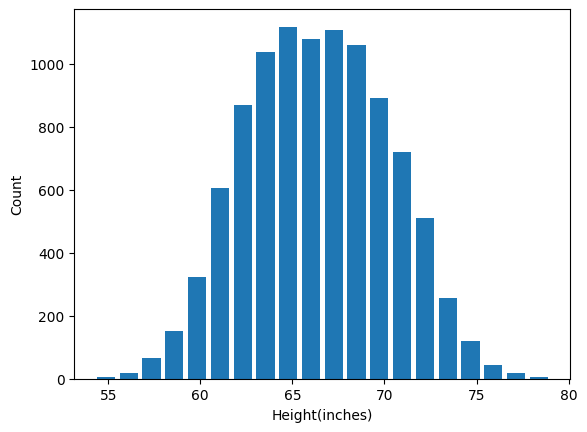

In [13]:
plt.hist(df.Height, rwidth=0.8, bins=20)
plt.xlabel("Height(inches)")
plt.ylabel("Count")

plt.show()

In [14]:
#to include the bell curve

from scipy.stats import norm
import numpy as np

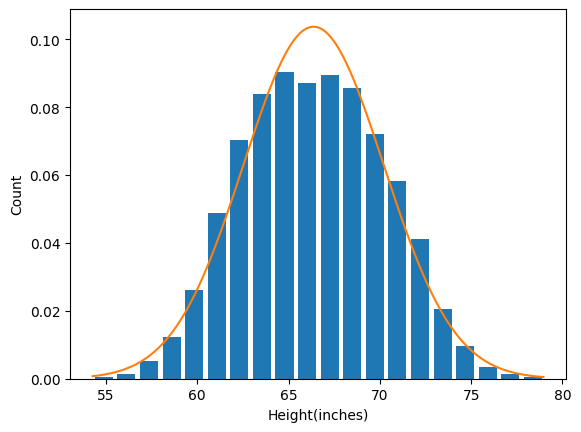

In [15]:
plt.hist(df.Height, bins=20, rwidth=0.8, density = True)
plt.xlabel('Height(inches)')
plt.ylabel('Count')

#plotting the bell curve
rng = np.arange(df.Height.min(), df.Height.max(), 0.1)
plt.plot(rng, norm.pdf(rng, df.Height.mean(), df.Height.std()))

plt.show()

In [16]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [18]:
# Using the three standard deviation to remove outliers from the data. This is the most used.
# figuring our the upper limit

upper_limit = df.Height.mean() + 3 * df.Height.std()

upper_limit

np.float64(77.91014411714093)

In [19]:
# figuring our the lower limit

lower_limit = df.Height.mean() - 3 * df.Height.std()

lower_limit

np.float64(54.82497539250156)

In [22]:
df[(df.Height > upper_limit) | (df.Height < lower_limit)]

,Gender,Height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [25]:
new_df = df[(df.Height < upper_limit) & (df.Height > lower_limit)]

new_df

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [26]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9993 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  9993 non-null   object 
 1   Height  9993 non-null   float64
dtypes: float64(1), object(1)
memory usage: 234.2+ KB


In [ ]:
# Using Z-score



In [31]:
df['zscore'] = ((df.Height - df.Height.mean()) / df.Height.std())

df

,Gender,Height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [35]:
df['zscore'].min()

np.float64(-3.146026760498775)

In [34]:
df['zscore'].max()


np.float64(3.282934443902102)

In [38]:
new_df2 = df[(df['zscore'] < 3) & (df['zscore'] > -3)]

new_df2

,Gender,Height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [ ]:
# using IQR



In [39]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

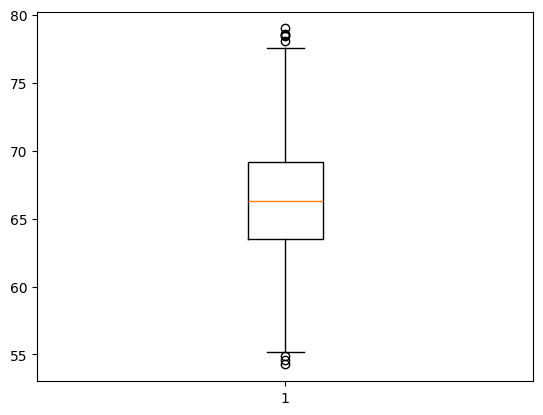

In [40]:
plt.boxplot(df.Height)
plt.show()

In [ ]:
# EDA

In [1]:
#an alternative to data import using google drive links
import pandas as pd
import requests
from io import StringIO

def read_gd(sharing_url):
    """Download a CSV file from Google Drive and return a Pandas DataFrame."""
    file_id = sharing_url.split('/')[-2]  # Extract file ID
    download_url = f"https://drive.google.com/uc?export=download&id={file_id}"

    response = requests.get(download_url)
    response.raise_for_status()  # Ensure successful request

    csv_raw = StringIO(response.text)
    return pd.read_csv(csv_raw)  # Read CSV file into a Pandas DataFrame

# Store Google Drive links mapped to years
google_drive_links = {
    2015: "https://drive.google.com/file/d/1wFf7X6SLvcyKCseQceZMFpouy1FWe9Ue/view?usp=sharing",
    2016: "https://drive.google.com/file/d/1VMj_adfvCn4HFkeM5k_n19w4gRGONJzg/view?usp=sharing",
    2017: "https://drive.google.com/file/d/1iXZxgAsgqewHM6xiNkcau4j8hieinT7Z/view?usp=sharing",
    2018: "https://drive.google.com/file/d/1uYsZZh1CT1qcd08S5WKNXsV-BB4VfUes/view?usp=sharing",
    2019: "https://drive.google.com/file/d/1UD6Ii65LGaHT2qojABw5bmaRrbA9d_-X/view?usp=sharing",
    2020: "https://drive.google.com/file/d/1jTTKtt3earqmT6G_7IY4chcENw6GtyoK/view?usp=sharing",
    2021: "https://drive.google.com/file/d/1OZBG3qRTmgYsQJkaC9R333g4yE7zNfsC/view?usp=sharing",
    2022: "https://drive.google.com/file/d/1k7hReawSjmvgx1AJQdvxAfjxpQdYwszE/view?usp=sharing",
    2023: "https://drive.google.com/file/d/1w3rr64qPCk48s28AXyx7Fsa-S8WPmO_R/view?usp=sharing"
}

# Read all CSV files and add the corresponding year
dfs = []  # List to store individual DataFrames

for year, link in google_drive_links.items():
    df = read_gd(link)  # Read CSV from Google Drive
    df['Year'] = year  # Add 'Year' column
    dfs.append(df)  # Append DataFrame to list

#Combine all datasets into one DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

# Display the first few rows
combined_df.head()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,Year
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,North America and ANZ,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015


In [3]:
combined_df.shape

(1367, 10)

In [4]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       1367 non-null   object 
 1   region                        1367 non-null   object 
 2   happiness_score               1367 non-null   float64
 3   gdp_per_capita                1367 non-null   float64
 4   social_support                1367 non-null   float64
 5   healthy_life_expectancy       1366 non-null   float64
 6   freedom_to_make_life_choices  1367 non-null   float64
 7   generosity                    1367 non-null   float64
 8   perceptions_of_corruption     1366 non-null   float64
 9   Year                          1367 non-null   int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 106.9+ KB


In [10]:
combined_df.isnull().sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         1
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       1
Year                            0
dtype: int64

In [8]:
missing_row_values = combined_df[combined_df.isnull().any(axis=1)]

missing_row_values

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,Year
489,United Arab Emirates,Middle East and North Africa,6.774,2.096,0.776,0.67,0.284,0.186,NaN,2018
1328,State of Palestine,Middle East and North Africa,4.908,1.144,1.309,NaN,0.416,0.065,0.067,2023


In [11]:
df = combined_df.dropna()

df.isnull().sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
Year                            0
dtype: int64

In [12]:
df.shape

(1365, 10)

In [18]:
# Check for duplicate

duplicates = df.duplicated()

# count the no of duplicate rows

num_duplicates = duplicates.sum()

print(f'No of duplicate is: {num_duplicates}')



No of duplicate is: 0


In [ ]:
# Summary statistics and outlier detection

In [19]:
df.describe()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,Year
count,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000
mean,5.440500,1.018542,1.045338,0.583980,0.450919,0.196364,0.132322,2018.901099
std,1.118053,0.453085,0.331248,0.245196,0.156780,0.113328,0.112583,2.560363
min,1.859000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,4.596000,0.696000,0.832044,0.402048,0.356000,0.115000,0.056767,2017.000000
50%,5.440000,1.041000,1.083000,0.612448,0.467735,0.182700,0.097000,2019.000000
75%,6.255000,1.338000,1.299370,0.777625,0.569000,0.252960,0.166000,2021.000000
max,7.842000,2.209000,1.644000,1.141000,0.772000,0.838075,0.587000,2023.000000


In [24]:
# Filter numerical columns for box plots

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

df[numerical_columns]

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,Year
0,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015
...,...,...,...,...,...,...,...,...
1362,3.207,0.53100,0.78400,0.10500,0.37500,0.18300,0.06800,2023
1363,3.204,0.75800,0.88100,0.06900,0.36300,0.11200,0.11700,2023
1364,3.138,0.67000,0.54000,0.09200,0.37100,0.19300,0.05100,2023
1365,2.392,1.41700,0.47600,0.39800,0.12300,0.06100,0.02700,2023


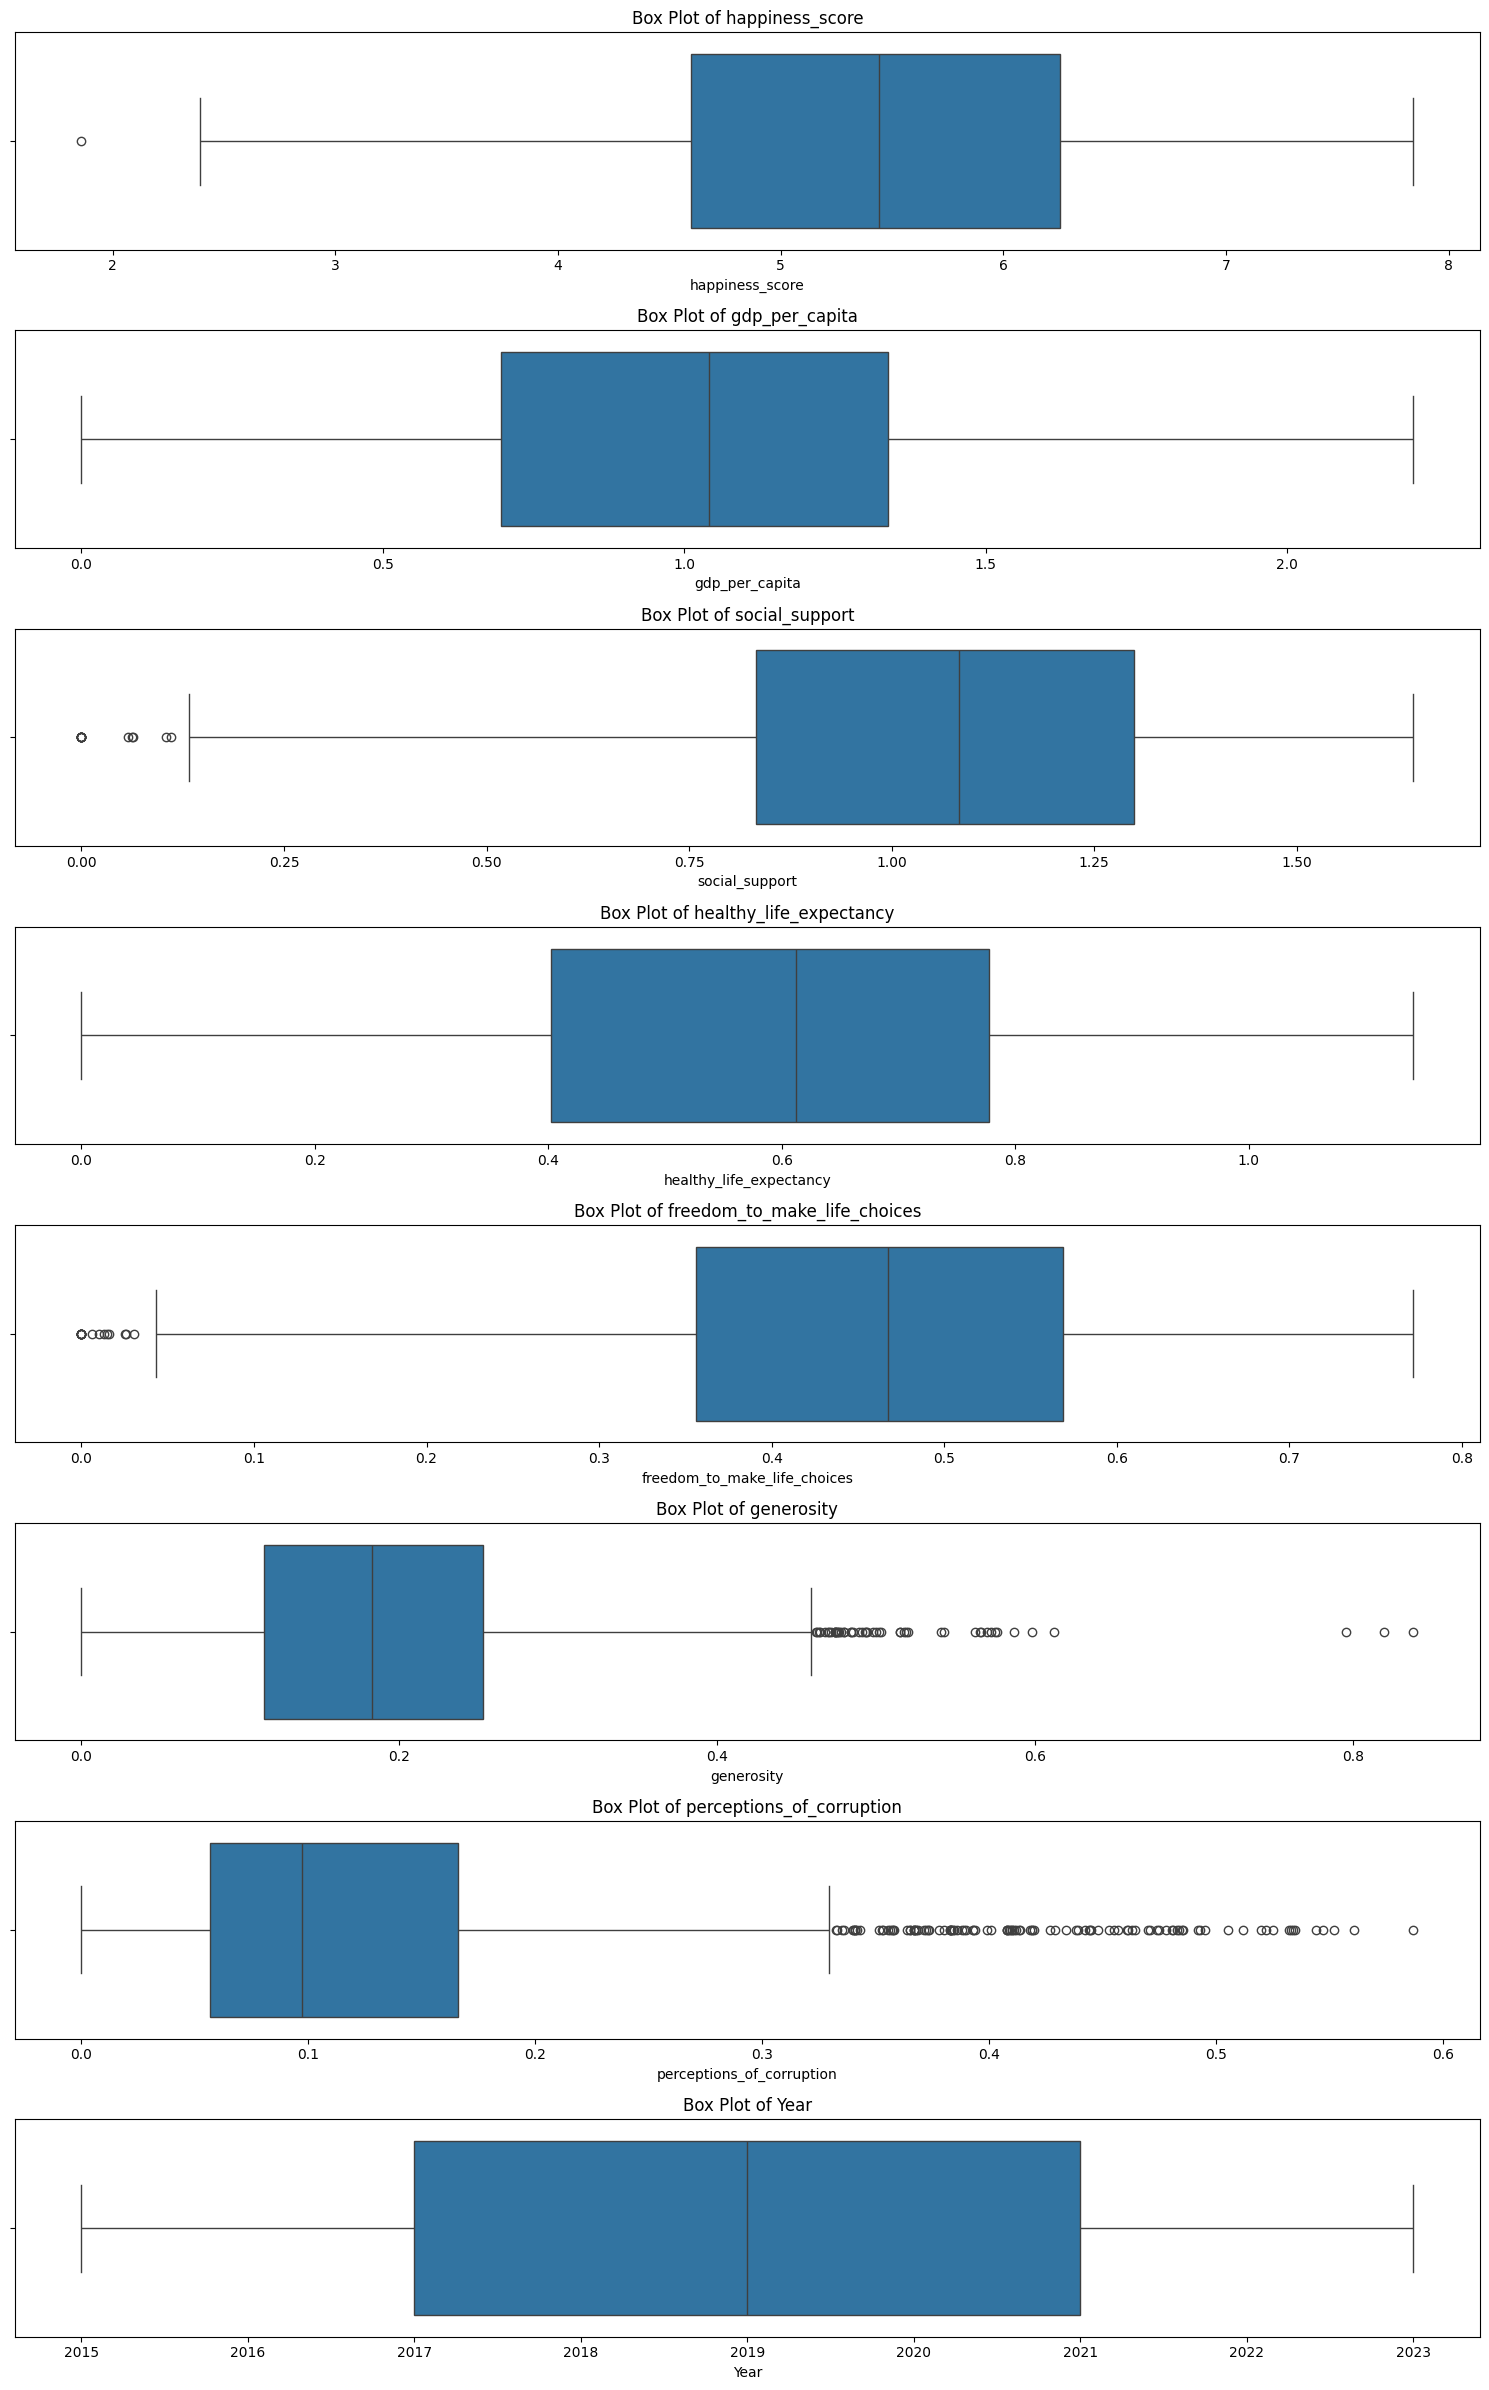

In [42]:
# Plot box plots for each numerical feature
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, len(numerical_columns) * 3))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()

In [43]:
#for perceptions_of_corruption
Q1 = df['perceptions_of_corruption'].quantile(0.25)
Q3 = df['perceptions_of_corruption'].quantile(0.75)
IQR = Q3-Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

df1 = df[(df.perceptions_of_corruption>lower_limit) & (df.perceptions_of_corruption<upper_limit)]

#for generosity
Q1 = df1['generosity'].quantile(0.25)
Q3 = df1['generosity'].quantile(0.75)
IQR = Q3-Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

data = df1[(df1.generosity > lower_limit) & (df1.generosity < upper_limit)]
data.head()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,Year
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
10,Israel,Middle East and North Africa,7.278,1.22857,1.22393,0.91387,0.41319,0.33172,0.07785,2015
11,Costa Rica,Latin America and Caribbean,7.226,0.95578,1.23788,0.86027,0.63376,0.25497,0.10583,2015
12,Austria,Western Europe,7.200,1.33723,1.29704,0.89042,0.62433,0.33088,0.18676,2015
13,Mexico,Latin America and Caribbean,7.187,1.02054,0.91451,0.81444,0.48181,0.14074,0.21312,2015


In [45]:
data.shape

(1207, 10)

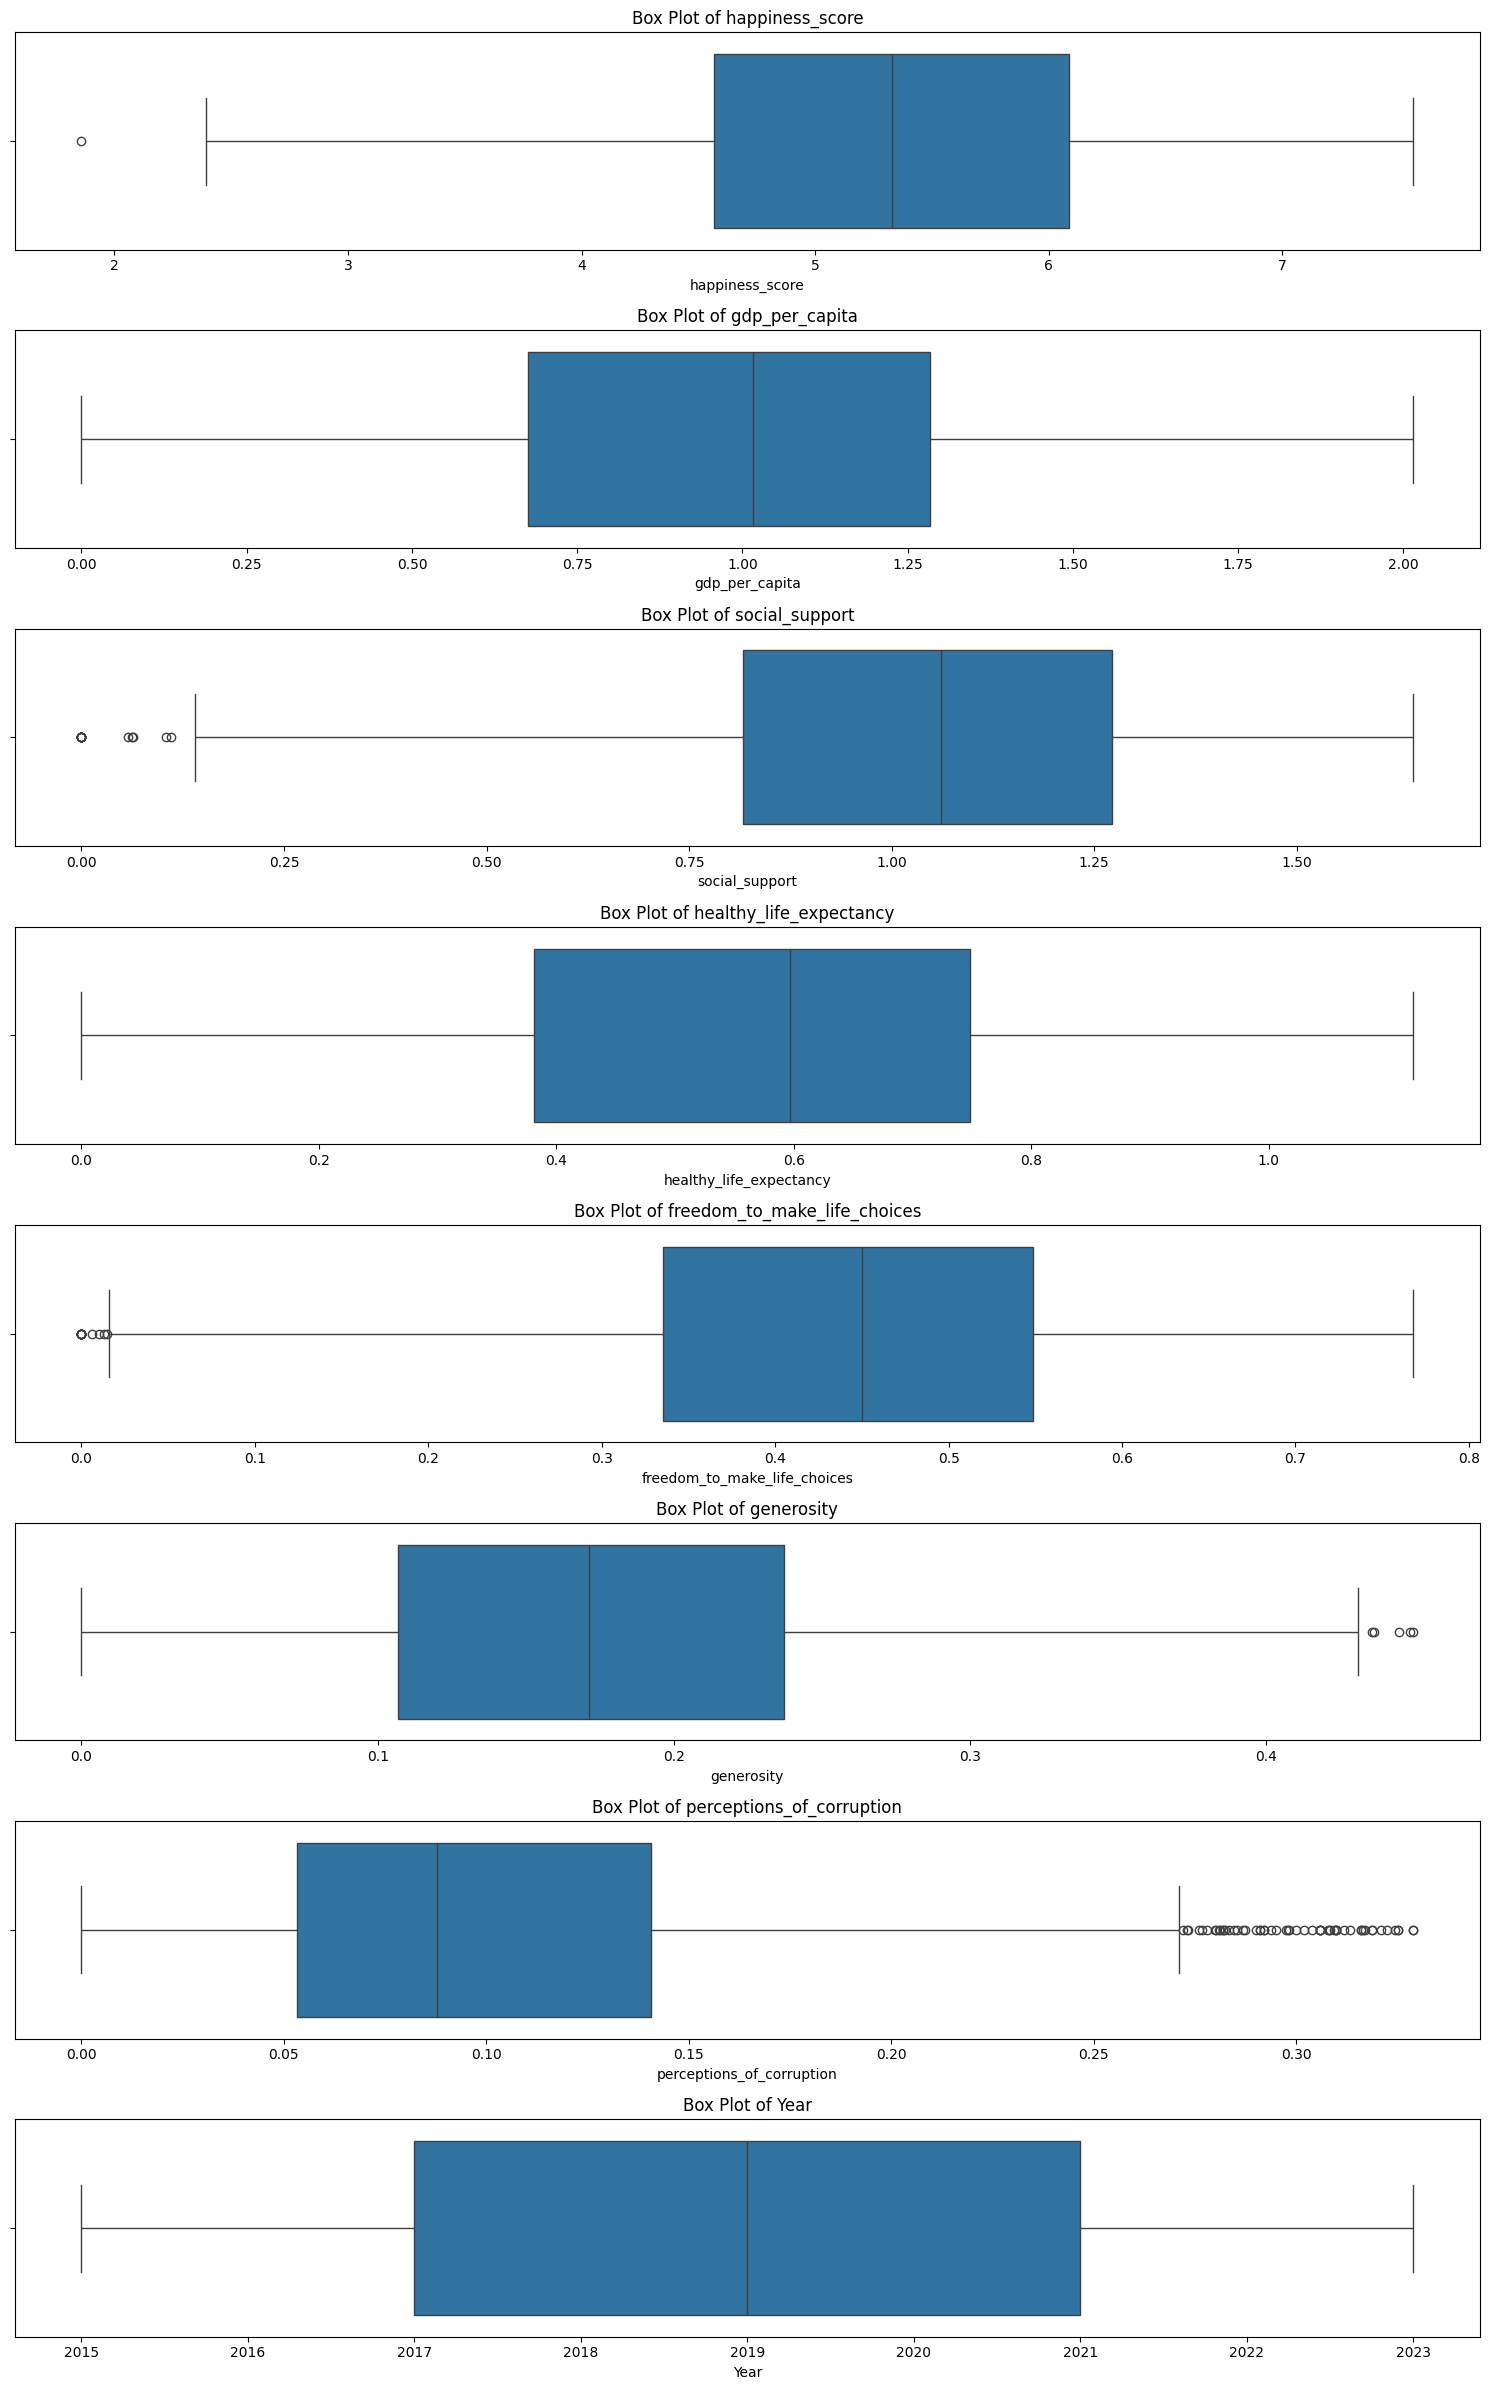

In [46]:
# Filter numerical columns for box plots
new_numerical_features = data.select_dtypes(include=['float64', 'int64']).columns

# Plot box plots for each numerical feature
plt.figure(figsize=(15, len(new_numerical_features) * 3))  # Adjust size based on the number of features
for i, col in enumerate(new_numerical_features, 1):
    plt.subplot(len(new_numerical_features), 1, i)
    sns.boxplot(x=data[col])
    plt.title(f"Box Plot of {col}")
    plt.tight_layout()

plt.show()

In [47]:
#seperating data into numeric and categorical

cat_df = df.select_dtypes(include=['object'])

numerical_df = df.select_dtypes(include=['float64', 'int64'])

In [58]:
for col_name in cat_df:
    print(col_name)
    
    


country
region


In [59]:
for col_name in numerical_df:
    print(col_name)

happiness_score
gdp_per_capita
social_support
healthy_life_expectancy
freedom_to_make_life_choices
generosity
perceptions_of_corruption
Year


In [63]:
#create a function for categorical analysis

def cat_univariate_analysis(discrete_data):
    for col_name in discrete_data:
        print("*" * 10, col_name, "*" * 10)
        print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
        print()
        print('Value Counts: \n', discrete_data[col_name].value_counts())
        print()
        
        

cat_univariate_analysis(cat_df)

********** country **********
count                                                   1365
nunique                                                  170
unique     [Switzerland, Iceland, Denmark, Norway, Canada...
Name: country, dtype: object

Value Counts: 
 country
Cyprus               11
Switzerland           9
Denmark               9
Norway                9
Canada                9
                     ..
Puerto Rico           1
Somaliland Region     1
Congo                 1
Eswatini              1
Turkiye               1
Name: count, Length: 170, dtype: int64

********** region **********
count                                                   1365
nunique                                                   11
unique     [Western Europe, North America and ANZ, Middle...
Name: region, dtype: object

Value Counts: 
 region
Sub-Saharan Africa                    337
Central and Eastern Europe            214
Latin America and Caribbean           190
Western Europe                        1

In [65]:
#function for numerical analysis

def numerical_univariate_analysis(numerical_data):
    for col_name in numerical_data:
        print("*"*10, col_name, "*"*10)
        print(numerical_data[col_name].agg(['min', 'max', 'mean', 'median', 'std', 'kurt', 'skew']))
        print()

numerical_univariate_analysis(numerical_df)

********** happiness_score **********
min       1.859000
max       7.842000
mean      5.440500
median    5.440000
std       1.118053
kurt     -0.588962
skew     -0.077094
Name: happiness_score, dtype: float64

********** gdp_per_capita **********
min       0.000000
max       2.209000
mean      1.018542
median    1.041000
std       0.453085
kurt     -0.460122
skew     -0.091480
Name: gdp_per_capita, dtype: float64

********** social_support **********
min       0.000000
max       1.644000
mean      1.045338
median    1.083000
std       0.331248
kurt      0.029702
skew     -0.609496
Name: social_support, dtype: float64

********** healthy_life_expectancy **********
min       0.000000
max       1.141000
mean      0.583980
median    0.612448
std       0.245196
kurt     -0.611826
skew     -0.303157
Name: healthy_life_expectancy, dtype: float64

********** freedom_to_make_life_choices **********
min       0.000000
max       0.772000
mean      0.450919
median    0.467735
std       0.156780
ku

In [ ]:
# Univariate graphical analysis

In [66]:
num_cols = len(numerical_df.columns)
num_cols

8

In [71]:
num_cols // 3

2

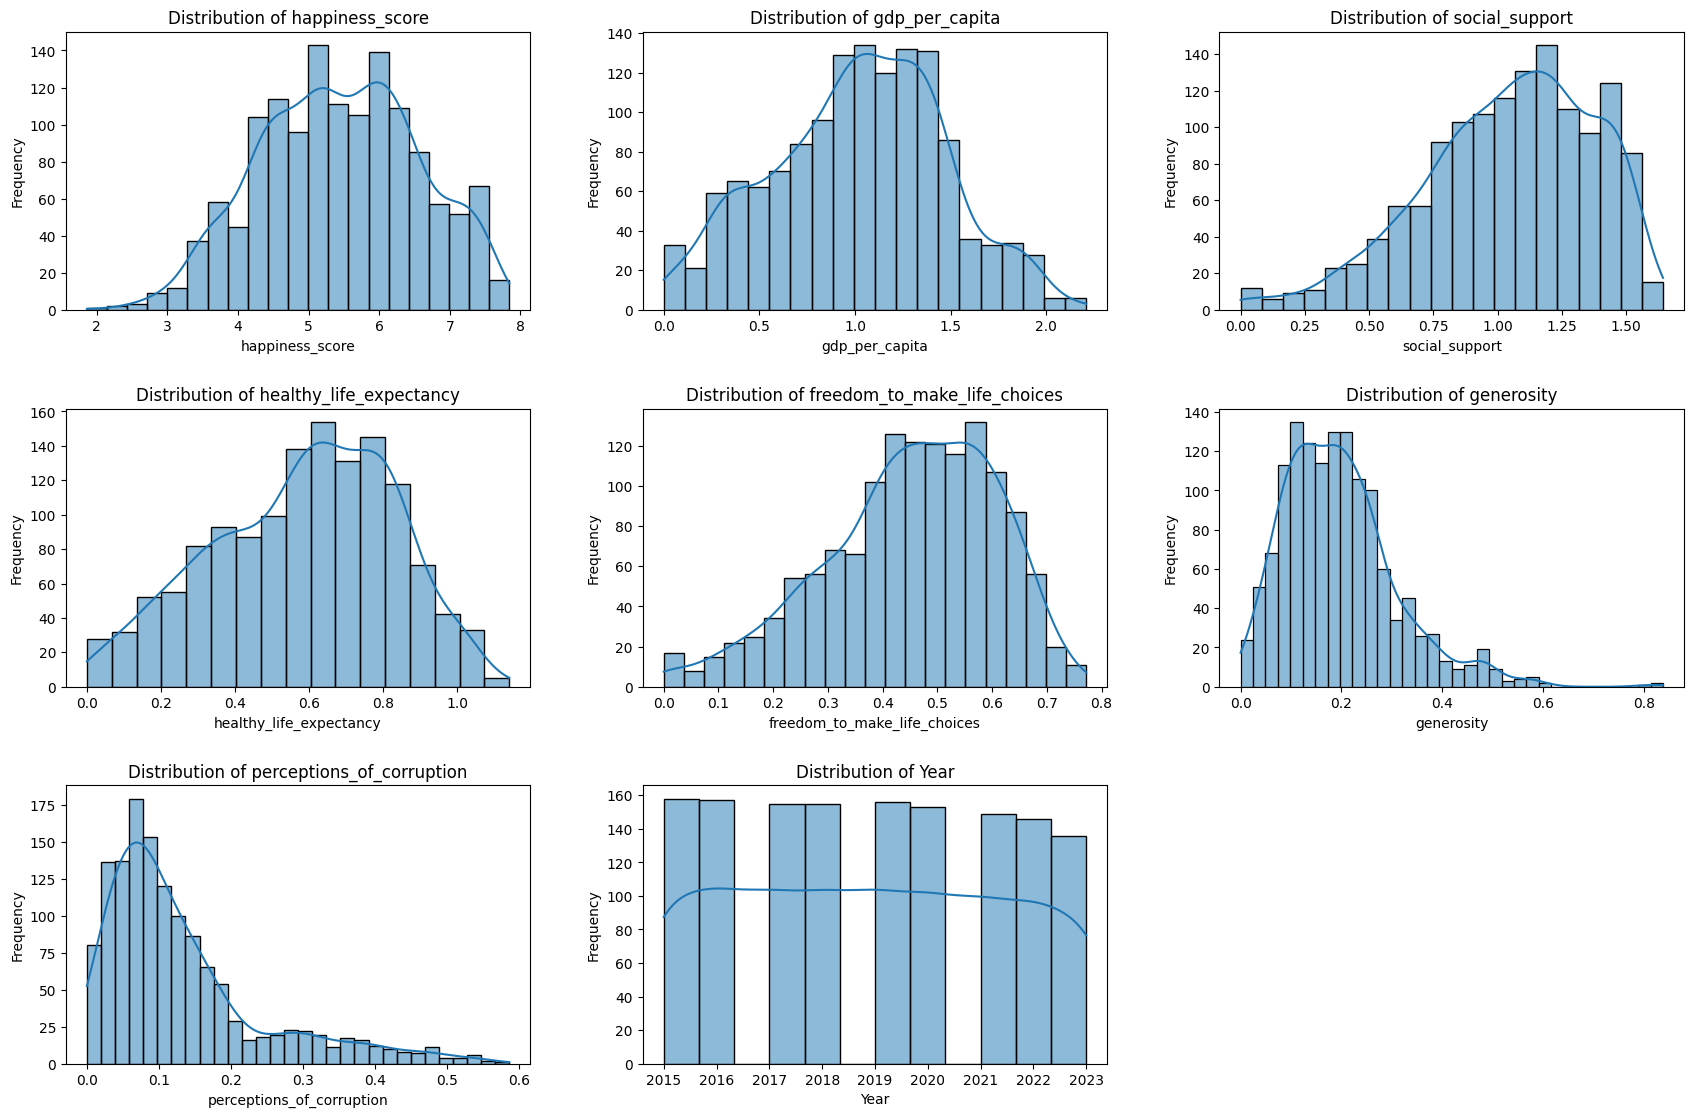

In [74]:
#creating a function to plot the distribution of the variables
def univariate_analysis(numerical_df):
    num_cols = len(numerical_df.columns)
    fig, axes = plt.subplots(nrows=(num_cols // 3) + 1, ncols=3,
                             figsize=(18, 4 * ((num_cols // 3) + 1)))
    fig.tight_layout(pad=5.0)

    axes = axes.flatten()  # Flatten axes array for easy iteration

    for i, col_name in enumerate(numerical_df.columns):
        sns.histplot(data=numerical_df, x=col_name, kde=True, ax=axes[i])
        # Use KDE for a smooth distribution curve
        axes[i].set_title(f'Distribution of {col_name}')
        axes[i].set_xlabel(col_name)
        axes[i].set_ylabel('Frequency')

    # Hide any extra subplots if the number of numeric columns is not a multiple of 3
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.show()

univariate_analysis(numerical_df)

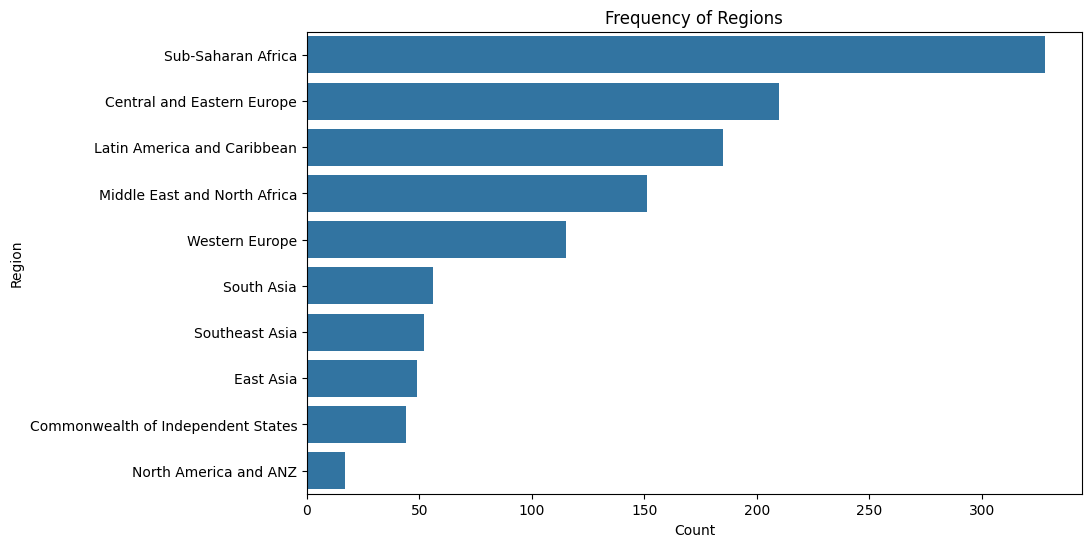

In [75]:
# Count the occurrences of each region
region_counts = data['region'].value_counts()

# Bar plot for Region
plt.figure(figsize=(10, 6))
sns.barplot(y=region_counts.index, x=region_counts.values)
plt.title("Frequency of Regions")
plt.ylabel("Region")
plt.xlabel("Count")
plt.show()

In [83]:
country_counts = data['country'].value_counts()
country_counts

country
Cyprus         11
South Korea     9
Costa Rica      9
Austria         9
Mexico          9
               ..
Congo           1
Eswatini        1
Indonesia       1
Turkiye         1
Myanmar         1
Name: count, Length: 161, dtype: int64

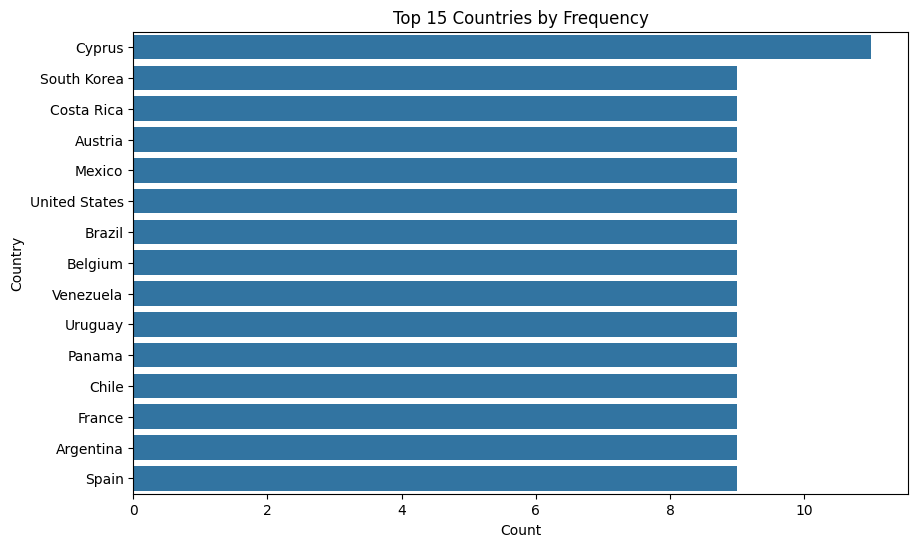

In [84]:
# Count the occurrences of each country
country_counts = data['country'].value_counts()

# Bar plot for top 10 countries
plt.figure(figsize=(10, 6))
sns.barplot(y=country_counts.head(15).index, x=country_counts.head(15).values)
plt.title("Top 15 Countries by Frequency")
plt.ylabel("Country")
plt.xlabel("Count")
plt.show()

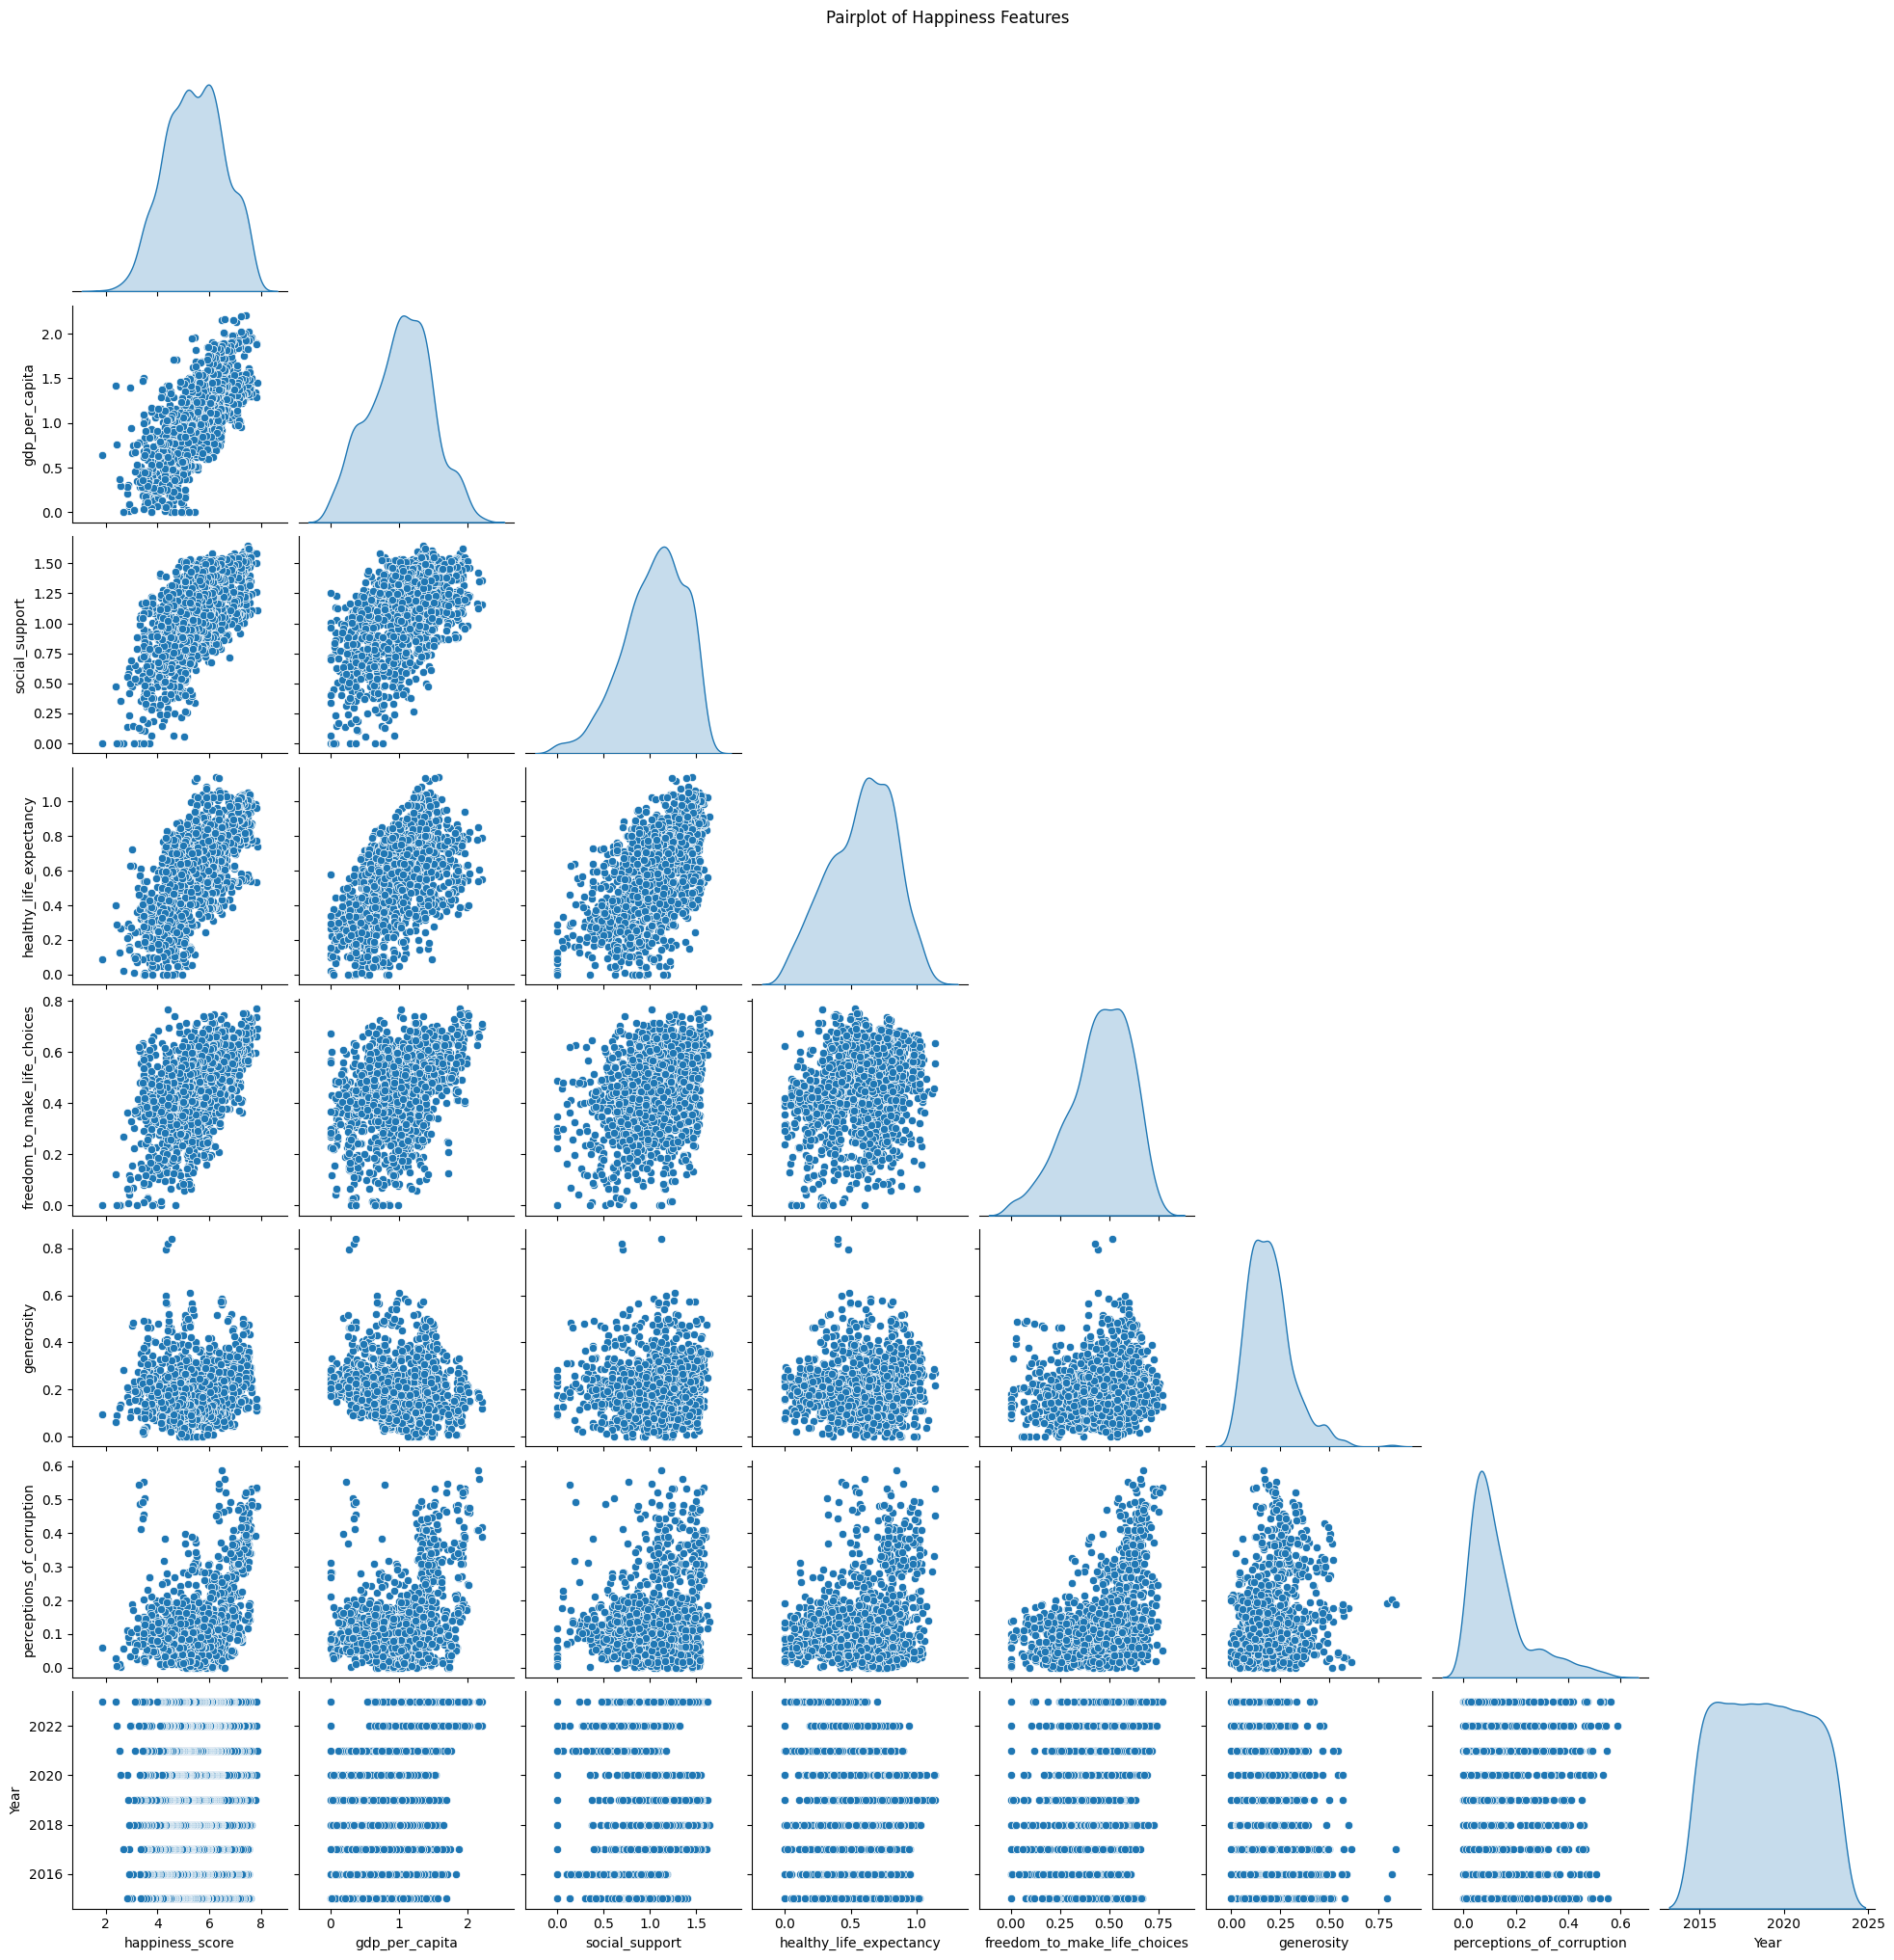

In [85]:
# Bivariate and Multivariate analysis

# Create the pairplot
sns.pairplot(numerical_df, diag_kind="kde", corner=True, height=2.5)

# Add a title to the plot
plt.suptitle("Pairplot of Happiness Features", y=1.02)
plt.show()

In [88]:
# Calculate standard deviation of happiness scores by region
region_dispersion = data.groupby('region')['happiness_score'].std().sort_values(ascending=False)

region_dispersion



region
Middle East and North Africa          0.996883
South Asia                            0.826308
Western Europe                        0.672744
Sub-Saharan Africa                    0.629012
Central and Eastern Europe            0.624657
Southeast Asia                        0.595775
Latin America and Caribbean           0.559923
East Asia                             0.463978
Commonwealth of Independent States    0.405791
North America and ANZ                 0.173296
Name: happiness_score, dtype: float64

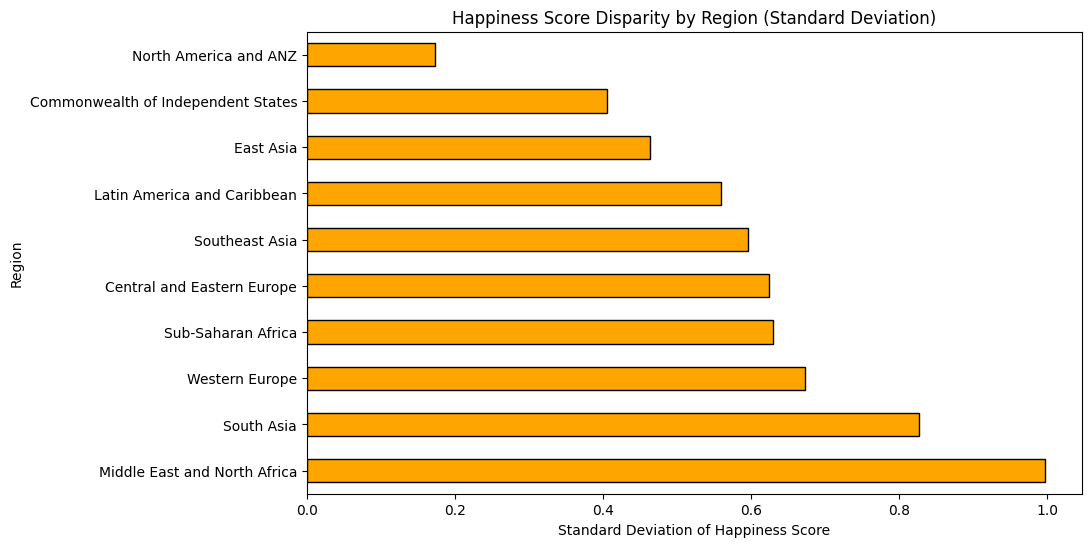

In [87]:
# Calculate standard deviation of happiness scores by region
region_dispersion = data.groupby('region')['happiness_score'].std().sort_values(ascending=False)

# Plot the disparities in happiness scores by region
region_dispersion.plot(kind='barh', figsize=(10, 6), color='orange', edgecolor='black')
plt.title('Happiness Score Disparity by Region (Standard Deviation)')
plt.xlabel('Standard Deviation of Happiness Score')
plt.ylabel('Region')
plt.show()


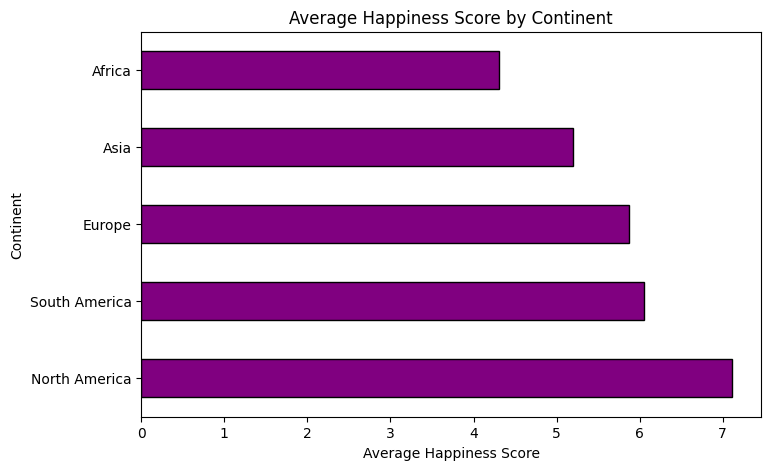

In [90]:
# Mapping regions to continents
region_to_continent = {
    'Western Europe': 'Europe',
    'Central and Eastern Europe': 'Europe',
    'North America and ANZ': 'North America',
    'Latin America and Caribbean': 'South America',
    'Sub-Saharan Africa': 'Africa',
    'Middle East and North Africa': 'Asia',
    'Southeast Asia': 'Asia',
    'East Asia': 'Asia',
    'South Asia': 'Asia',
    'Commonwealth of Independent States': 'Europe'
}

# Add Continent column
data.loc[:, 'continent'] = data['region'].map(region_to_continent)

# Group by Continent and calculate average happiness score
continent_happiness = data.groupby('continent')['happiness_score'].mean().sort_values(ascending=False)

# Plot the results
continent_happiness.plot(kind='barh', figsize=(8, 5), color='purple', edgecolor='black')
plt.title('Average Happiness Score by Continent')
plt.xlabel('Average Happiness Score')
plt.ylabel('Continent')
plt.show()

Correlation between GDP per capita and happiness scores: 0.691277050078479


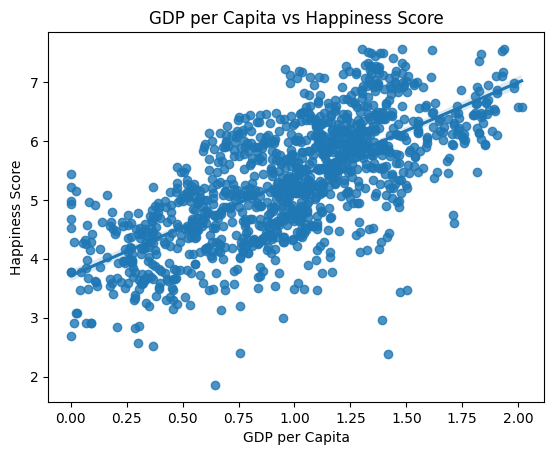

In [91]:
# 3. Is there a strong correlation between GDP per capita and happiness scores?

# Correlation calculation
correlation = data['gdp_per_capita'].corr(data['happiness_score'])
print(f"Correlation between GDP per capita and happiness scores: {correlation}")

# Scatter plot with regression line
sns.regplot(x='gdp_per_capita', y='happiness_score', data=data)
plt.title("GDP per Capita vs Happiness Score")
plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")
plt.show()

Correlation between social support and happiness scores: 0.6258515868016099


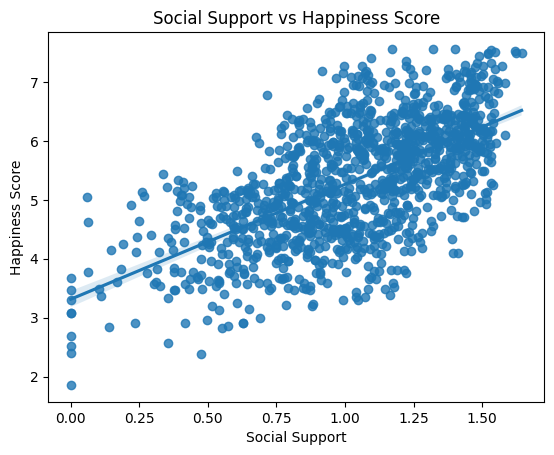

In [92]:
# 4. How does social support influence

# Correlation calculation
correlation = data['social_support'].corr(data['happiness_score'])
print(f"Correlation between social support and happiness scores: {correlation}")

# Scatter plot with regression line
sns.regplot(x='social_support', y='happiness_score', data=data)
plt.title("Social Support vs Happiness Score")
plt.xlabel("Social Support")
plt.ylabel("Happiness Score")
plt.show()


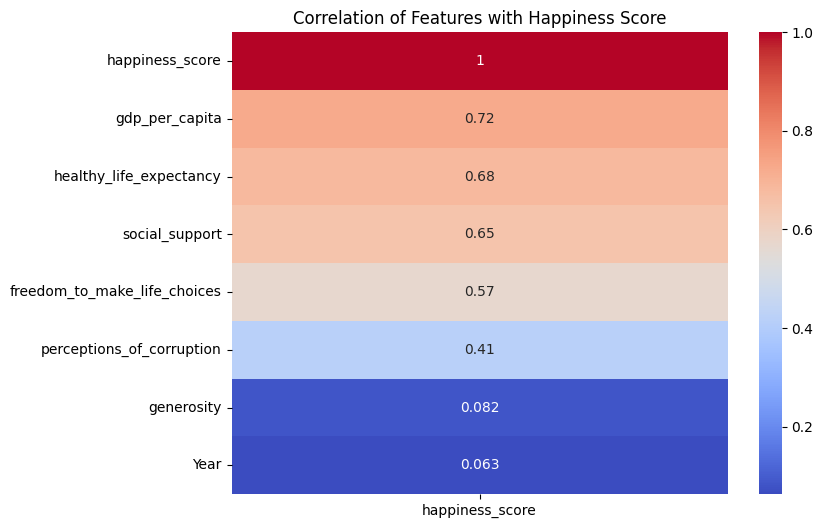

In [93]:
#  Which factors have the strongest relationships with happiness score?

# Correlation matrix
# Heatmap of top correlations
plt.figure(figsize=(8, 6))
sns.heatmap(numerical_df.corr()[['happiness_score']].sort_values(by='happiness_score', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation of Features with Happiness Score")
plt.show()

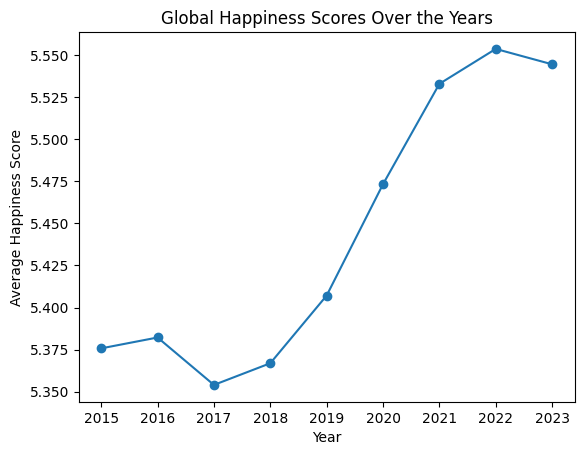

In [94]:
# How have global happiness scores changed over the years?

# Line plot for average happiness score by year
average_happiness_by_year = df.groupby('Year')['happiness_score'].mean()
plt.plot(average_happiness_by_year, marker='o')
plt.title("Global Happiness Scores Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Happiness Score")
plt.show()


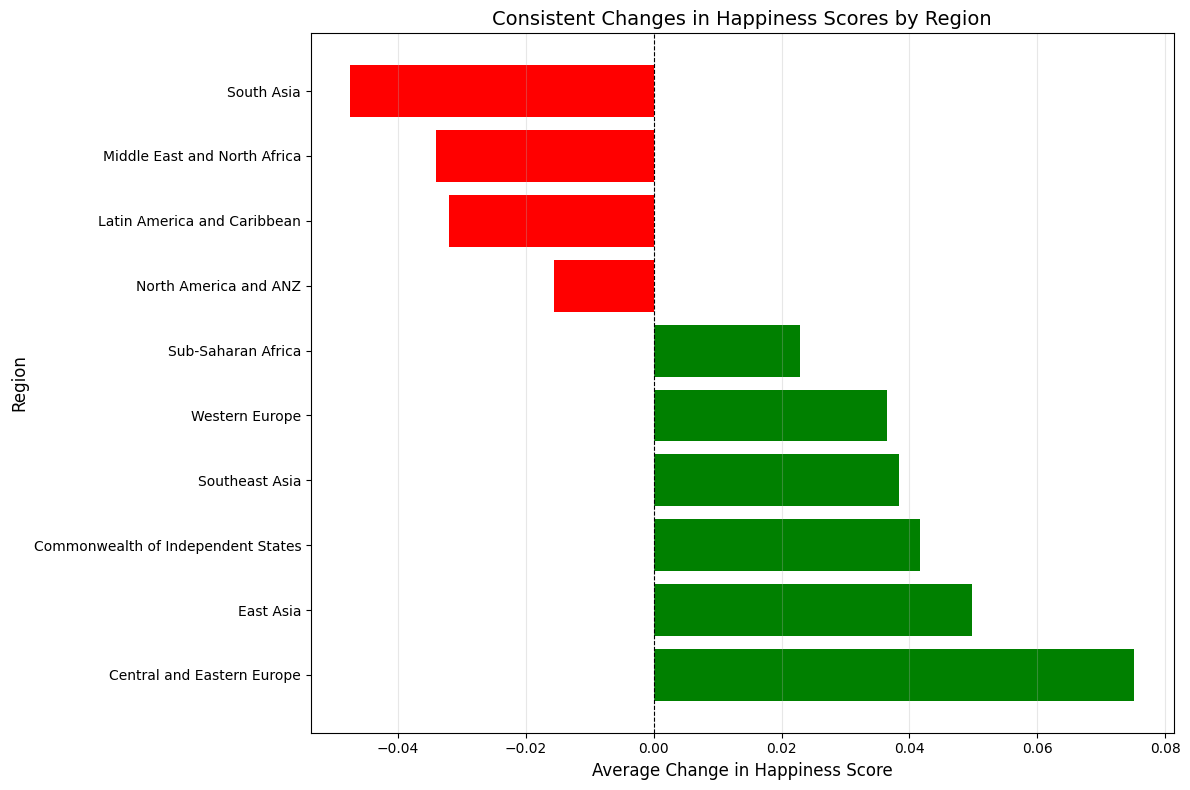

In [97]:
# Are there regions with consistent improvements or declines in happiness?
# Step 1: aggregating
data_cleaned = data.groupby(['Year', 'region'], as_index=False)['happiness_score'].mean()

# Step 2: Pivot the data to calculate year-over-year changes
happiness_trend = data_cleaned.pivot(index='Year',
                                     columns='region',
                                     values='happiness_score').diff().mean()

# Step 3: Identify consistent increases and decreases
consistent_increase = happiness_trend[happiness_trend > 0].sort_values(ascending=False)
consistent_decrease = happiness_trend[happiness_trend < 0].sort_values()

# Step 4: Plot the consistent changes
# Combine consistent increases and decreases
trend_data = pd.concat([consistent_increase, consistent_decrease])
trend_data = trend_data.sort_values(ascending=False)

# Bar plot for consistent changes
plt.figure(figsize=(12, 8))
colors = trend_data.apply(lambda x: 'green' if x > 0 else 'red')  # Green for increase, red for decrease
plt.barh(trend_data.index, trend_data.values, color=colors)

# Add labels and title
plt.title("Consistent Changes in Happiness Scores by Region", fontsize=14)
plt.xlabel("Average Change in Happiness Score", fontsize=12)
plt.ylabel("Region", fontsize=12)
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  # Reference line at 0
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()